# %% [markdown]
# # SO SÁNH APRIORI vs FP-GROWTH
# 
# **Mục tiêu:**
# - So sánh hiệu suất giữa hai thuật toán
# - Phân tích độ nhạy tham số
# - Trực quan hóa so sánh

In [1]:
import sys
sys.path.append('../src')

from apriori_library import AssociationRulesMiner, FPGrowthMiner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

# Thiết lập style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Tải dữ liệu
basket_bool = pd.read_parquet('../data/processed/basket_bool.parquet')
print(f"Kích thước basket_bool: {basket_bool.shape}")

Kích thước basket_bool: (16646, 3844)


In [3]:
# Hàm so sánh hiệu suất
def compare_algorithms(min_support=0.01, min_confidence=0.3, min_lift=1.2):
    """So sánh hiệu suất giữa Apriori và FP-Growth"""
    
    results = {}
    
    # 1. Apriori
    print("="*60)
    print("CHẠY APRIORI...")
    print("="*60)
    
    apriori_miner = AssociationRulesMiner(basket_bool)
    
    # Thời gian tìm itemsets
    start_time = time.time()
    apriori_itemsets = apriori_miner.find_frequent_itemsets(min_support)
    apriori_itemset_time = time.time() - start_time
    
    # Thời gian sinh luật
    start_time = time.time()
    apriori_rules = apriori_miner.generate_rules(min_confidence, min_lift)
    apriori_rules_time = time.time() - start_time
    
    apriori_total_time = apriori_itemset_time + apriori_rules_time
    
    results['apriori'] = {
        'itemsets': len(apriori_itemsets),
        'rules': len(apriori_rules),
        'itemset_time': apriori_itemset_time,
        'rules_time': apriori_rules_time,
        'total_time': apriori_total_time,
        'avg_support': apriori_itemsets['support'].mean(),
        'avg_confidence': apriori_rules['confidence'].mean() if len(apriori_rules) > 0 else 0,
        'avg_lift': apriori_rules['lift'].mean() if len(apriori_rules) > 0 else 0
    }
    
    # 2. FP-Growth
    print("\n" + "="*60)
    print("CHẠY FP-GROWTH...")
    print("="*60)
    
    fpgrowth_miner = FPGrowthMiner(basket_bool)
    
    # Thời gian tìm itemsets
    start_time = time.time()
    fpgrowth_itemsets = fpgrowth_miner.find_frequent_itemsets(min_support)
    fpgrowth_itemset_time = time.time() - start_time
    
    # Thời gian sinh luật
    start_time = time.time()
    fpgrowth_rules = fpgrowth_miner.generate_rules(min_confidence, min_lift)
    fpgrowth_rules_time = time.time() - start_time
    
    fpgrowth_total_time = fpgrowth_itemset_time + fpgrowth_rules_time
    
    results['fpgrowth'] = {
        'itemsets': len(fpgrowth_itemsets),
        'rules': len(fpgrowth_rules),
        'itemset_time': fpgrowth_itemset_time,
        'rules_time': fpgrowth_rules_time,
        'total_time': fpgrowth_total_time,
        'avg_support': fpgrowth_itemsets['support'].mean(),
        'avg_confidence': fpgrowth_rules['confidence'].mean() if len(fpgrowth_rules) > 0 else 0,
        'avg_lift': fpgrowth_rules['lift'].mean() if len(fpgrowth_rules) > 0 else 0
    }
    
    return results

In [4]:
# So sánh với tham số mặc định
print("SO SÁNH VỚI THAM SỐ MẶC ĐỊNH:")
print("min_support = 0.01, min_confidence = 0.3, min_lift = 1.2")
print()

results = compare_algorithms(min_support=0.01, min_confidence=0.3, min_lift=1.2)

SO SÁNH VỚI THAM SỐ MẶC ĐỊNH:
min_support = 0.01, min_confidence = 0.3, min_lift = 1.2

CHẠY APRIORI...
Apriori: 970 tập phổ biến
Apriori: 615 luật

CHẠY FP-GROWTH...
FP-Growth: 970 tập phổ biến
FP-Growth: 615 luật


In [5]:
# Hiển thị bảng so sánh
print("\n" + "="*60)
print("BẢNG SO SÁNH HIỆU SUẤT")
print("="*60)

comparison_data = {
    'Chỉ số': [
        'Số tập phổ biến',
        'Số luật kết hợp',
        'Thời gian tìm itemsets (s)',
        'Thời gian sinh luật (s)',
        'Tổng thời gian (s)',
        'Support trung bình',
        'Confidence trung bình',
        'Lift trung bình'
    ],
    'Apriori': [
        results['apriori']['itemsets'],
        results['apriori']['rules'],
        f"{results['apriori']['itemset_time']:.4f}",
        f"{results['apriori']['rules_time']:.4f}",
        f"{results['apriori']['total_time']:.4f}",
        f"{results['apriori']['avg_support']:.4f}",
        f"{results['apriori']['avg_confidence']:.4f}",
        f"{results['apriori']['avg_lift']:.4f}"
    ],
    'FP-Growth': [
        results['fpgrowth']['itemsets'],
        results['fpgrowth']['rules'],
        f"{results['fpgrowth']['itemset_time']:.4f}",
        f"{results['fpgrowth']['rules_time']:.4f}",
        f"{results['fpgrowth']['total_time']:.4f}",
        f"{results['fpgrowth']['avg_support']:.4f}",
        f"{results['fpgrowth']['avg_confidence']:.4f}",
        f"{results['fpgrowth']['avg_lift']:.4f}"
    ],
    'Cải thiện': [
        f"{(results['fpgrowth']['itemsets'] - results['apriori']['itemsets']) / results['apriori']['itemsets'] * 100:+.1f}%",
        f"{(results['fpgrowth']['rules'] - results['apriori']['rules']) / results['apriori']['rules'] * 100:+.1f}%",
        f"{(results['apriori']['itemset_time'] - results['fpgrowth']['itemset_time']) / results['apriori']['itemset_time'] * 100:+.1f}%",
        f"{(results['apriori']['rules_time'] - results['fpgrowth']['rules_time']) / results['apriori']['rules_time'] * 100:+.1f}%",
        f"{(results['apriori']['total_time'] - results['fpgrowth']['total_time']) / results['apriori']['total_time'] * 100:+.1f}%",
        f"{(results['fpgrowth']['avg_support'] - results['apriori']['avg_support']) / results['apriori']['avg_support'] * 100:+.1f}%",
        f"{(results['fpgrowth']['avg_confidence'] - results['apriori']['avg_confidence']) / results['apriori']['avg_confidence'] * 100:+.1f}%",
        f"{(results['fpgrowth']['avg_lift'] - results['apriori']['avg_lift']) / results['apriori']['avg_lift'] * 100:+.1f}%"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))


BẢNG SO SÁNH HIỆU SUẤT
                    Chỉ số Apriori FP-Growth Cải thiện
           Số tập phổ biến     970       970     +0.0%
           Số luật kết hợp     615       615     +0.0%
Thời gian tìm itemsets (s) 18.6773    2.2889    +87.7%
   Thời gian sinh luật (s)  0.0384    0.0022    +94.3%
        Tổng thời gian (s) 18.7157    2.2911    +87.8%
        Support trung bình  0.0178    0.0178     +0.0%
     Confidence trung bình  0.5000    0.5000     -0.0%
           Lift trung bình 13.9494   13.9494     +0.0%


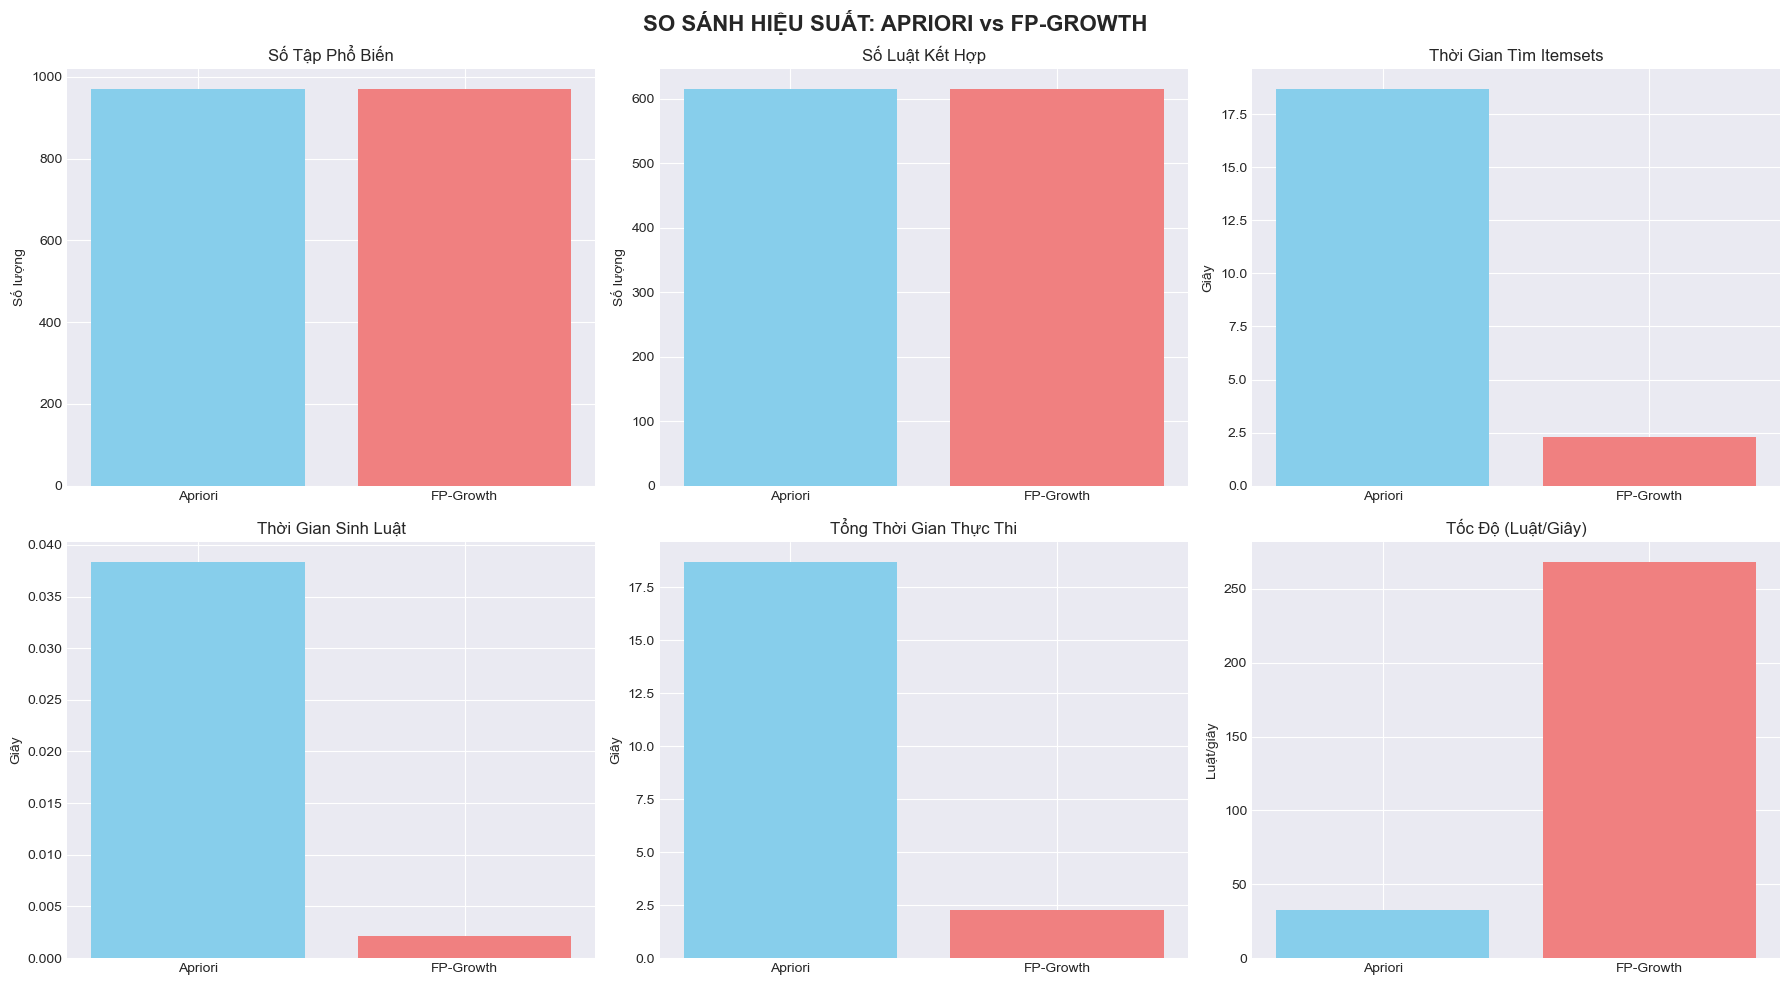

In [6]:
# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Số tập phổ biến
axes[0, 0].bar(['Apriori', 'FP-Growth'], 
               [results['apriori']['itemsets'], results['fpgrowth']['itemsets']],
               color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Số Tập Phổ Biến')
axes[0, 0].set_ylabel('Số lượng')

# 2. Số luật
axes[0, 1].bar(['Apriori', 'FP-Growth'], 
               [results['apriori']['rules'], results['fpgrowth']['rules']],
               color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Số Luật Kết Hợp')
axes[0, 1].set_ylabel('Số lượng')

# 3. Thời gian tìm itemsets
axes[0, 2].bar(['Apriori', 'FP-Growth'], 
               [results['apriori']['itemset_time'], results['fpgrowth']['itemset_time']],
               color=['skyblue', 'lightcoral'])
axes[0, 2].set_title('Thời Gian Tìm Itemsets')
axes[0, 2].set_ylabel('Giây')

# 4. Thời gian sinh luật
axes[1, 0].bar(['Apriori', 'FP-Growth'], 
               [results['apriori']['rules_time'], results['fpgrowth']['rules_time']],
               color=['skyblue', 'lightcoral'])
axes[1, 0].set_title('Thời Gian Sinh Luật')
axes[1, 0].set_ylabel('Giây')

# 5. Tổng thời gian
axes[1, 1].bar(['Apriori', 'FP-Growth'], 
               [results['apriori']['total_time'], results['fpgrowth']['total_time']],
               color=['skyblue', 'lightcoral'])
axes[1, 1].set_title('Tổng Thời Gian Thực Thi')
axes[1, 1].set_ylabel('Giây')

# 6. Tốc độ (luật/giây)
apriori_speed = results['apriori']['rules'] / results['apriori']['total_time'] if results['apriori']['total_time'] > 0 else 0
fpgrowth_speed = results['fpgrowth']['rules'] / results['fpgrowth']['total_time'] if results['fpgrowth']['total_time'] > 0 else 0
axes[1, 2].bar(['Apriori', 'FP-Growth'], 
               [apriori_speed, fpgrowth_speed],
               color=['skyblue', 'lightcoral'])
axes[1, 2].set_title('Tốc Độ (Luật/Giây)')
axes[1, 2].set_ylabel('Luật/giây')

plt.suptitle('SO SÁNH HIỆU SUẤT: APRIORI vs FP-GROWTH', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
# PHÂN TÍCH ĐỘ NHẠY THAM SỐ - PHIÊN BẢN AN TOÀN
print("\n" + "="*60)
print("PHÂN TÍCH ĐỘ NHẠY THEO MIN_SUPPORT")
print("="*60)

# Dùng giá trị support cao hơn để tránh lỗi bộ nhớ
support_values = [0.02, 0.03, 0.05, 0.08, 0.1]  # CAO HƠN
results_by_support = []

for support in support_values:
    print(f"\n{'='*40}")
    print(f"Đang chạy với min_support = {support:.3f}")
    print(f"{'='*40}")
    
    try:
        # Apriori - với bộ nhớ thấp
        print("Chạy Apriori...")
        apriori_miner = AssociationRulesMiner(basket_bool)
        ap_start = time.time()
        
        # Thêm max_len nhỏ hơn để giới hạn tổ hợp
        apriori_itemsets = apriori_miner.find_frequent_itemsets(support)
        if apriori_itemsets is not None and len(apriori_itemsets) > 0:
            apriori_rules = apriori_miner.generate_rules(0.3, 1.2)
            ap_time = time.time() - ap_start
            print(f"Apriori: {ap_time:.2f}s, {len(apriori_itemsets)} itemsets")
        else:
            ap_time = 0
            print("Apriori: Không tìm thấy itemsets")
        
    except MemoryError:
        print(f"❌ Apriori bị lỗi MemoryError với support={support}")
        ap_time = float('inf')
    
    try:
        # FP-Growth - xử lý tốt hơn với dữ liệu lớn
        print("Chạy FP-Growth...")
        fp_miner = FPGrowthMiner(basket_bool)
        fp_start = time.time()
        
        fp_itemsets = fp_miner.find_frequent_itemsets(support)
        if fp_itemsets is not None and len(fp_itemsets) > 0:
            fp_rules = fp_miner.generate_rules(0.3, 1.2)
            fp_time = time.time() - fp_start
            print(f"FP-Growth: {fp_time:.2f}s, {len(fp_itemsets)} itemsets")
        else:
            fp_time = 0
            print("FP-Growth: Không tìm thấy itemsets")
            
    except Exception as e:
        print(f"❌ FP-Growth lỗi: {e}")
        fp_time = float('inf')
    
    # Tính speedup (chỉ khi cả hai thành công)
    if ap_time > 0 and fp_time > 0 and ap_time != float('inf') and fp_time != float('inf'):
        speedup = ap_time / fp_time if fp_time > 0 else 0
    else:
        speedup = 0
    
    results_by_support.append({
        'min_support': support,
        'apriori_time': f"{ap_time:.2f}s" if ap_time != float('inf') else "LỖI",
        'fpgrowth_time': f"{fp_time:.2f}s" if fp_time != float('inf') else "LỖI",
        'speedup': f"{speedup:.1f}x" if speedup > 0 else "N/A"
    })

# Chuyển thành DataFrame
sensitivity_df = pd.DataFrame(results_by_support)
print("\n" + "="*60)
print("KẾT QUẢ PHÂN TÍCH ĐỘ NHẠY:")
print("="*60)
print(sensitivity_df.to_string(index=False))


PHÂN TÍCH ĐỘ NHẠY THEO MIN_SUPPORT

Đang chạy với min_support = 0.020
Chạy Apriori...
Apriori: 235 tập phổ biến
Apriori: 67 luật
Apriori: 0.52s, 235 itemsets
Chạy FP-Growth...
FP-Growth: 235 tập phổ biến
FP-Growth: 67 luật
FP-Growth: 1.15s, 235 itemsets

Đang chạy với min_support = 0.030
Chạy Apriori...
Apriori: 89 tập phổ biến
Apriori: 2 luật
Apriori: 0.13s, 89 itemsets
Chạy FP-Growth...
FP-Growth: 89 tập phổ biến
FP-Growth: 2 luật
FP-Growth: 0.63s, 89 itemsets

Đang chạy với min_support = 0.050
Chạy Apriori...
Apriori: 19 tập phổ biến
Apriori: 0 luật
Apriori: 0.05s, 19 itemsets
Chạy FP-Growth...
FP-Growth: 19 tập phổ biến
FP-Growth: 0 luật
FP-Growth: 0.51s, 19 itemsets

Đang chạy với min_support = 0.080
Chạy Apriori...
Apriori: 3 tập phổ biến
Apriori: 0 luật
Apriori: 0.04s, 3 itemsets
Chạy FP-Growth...
FP-Growth: 3 tập phổ biến
FP-Growth: 0 luật
FP-Growth: 0.49s, 3 itemsets

Đang chạy với min_support = 0.100
Chạy Apriori...
Apriori: 1 tập phổ biến
Apriori: 0 luật
Apriori: 0.04s, 1 i

Kiểm tra kiểu dữ liệu trong sensitivity_df:
min_support      float64
apriori_time      object
fpgrowth_time     object
speedup           object
dtype: object

Giá trị trong cột 'speedup':
['0.5x', '0.2x', '0.1x', '0.1x', '0.1x']

✅ Đã chuyển đổi speedup sang số:
 min_support speedup  speedup_numeric
        0.02    0.5x              0.5
        0.03    0.2x              0.2
        0.05    0.1x              0.1
        0.08    0.1x              0.1
        0.10    0.1x              0.1


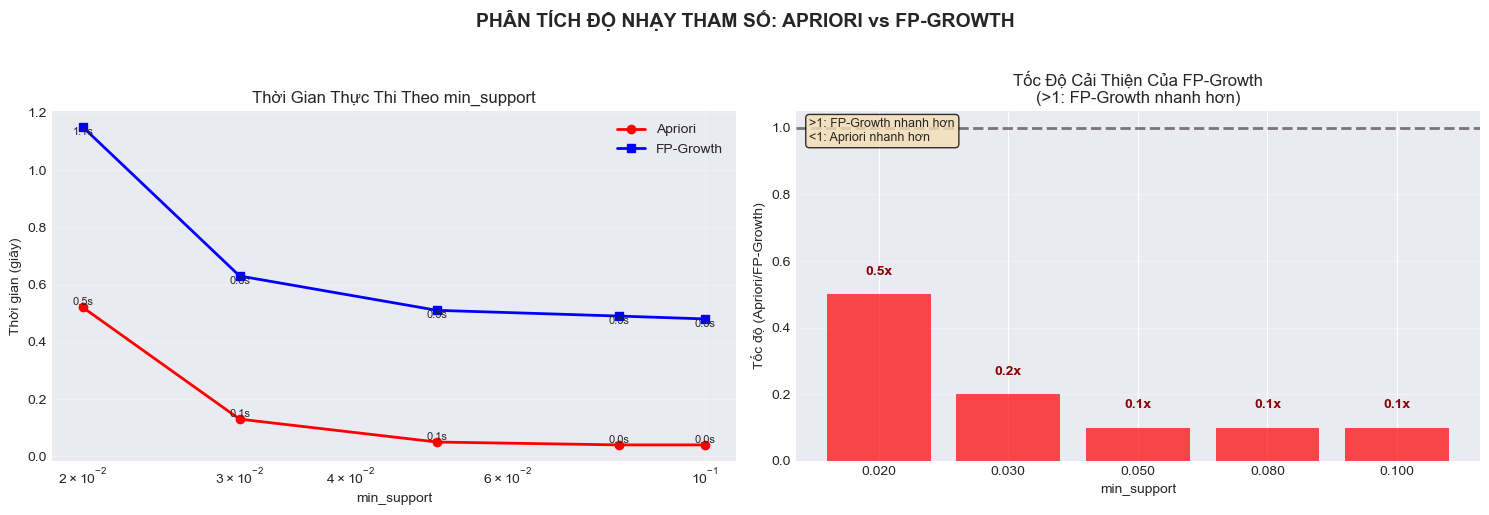


THỐNG KÊ KẾT QUẢ PHÂN TÍCH ĐỘ NHẠY

1. TỐC ĐỘ TRUNG BÌNH CẢI THIỆN:
   • Trung bình: 0.2x cải thiện
   • Tối đa: 0.5x (min_support = 0.020)
   • Tối thiểu: 0.1x (min_support = 0.050)

2. KHUYẾN NGHỊ:
   ❌ Apriori hiệu quả hơn với dữ liệu này

3. MIN_SUPPORT TỐI ƯU:
   • Khuyến nghị: min_support = 0.020
   • Tốc độ cải thiện: 0.5x
   • Thời gian FP-Growth: 1.1 giây


In [11]:
# ====================== SỬA LỖI TRƯỚC KHI VẼ ======================

# 1. Kiểm tra kiểu dữ liệu
print("Kiểm tra kiểu dữ liệu trong sensitivity_df:")
print(sensitivity_df.dtypes)
print("\nGiá trị trong cột 'speedup':")
print(sensitivity_df['speedup'].tolist())

# 2. Chuyển đổi cột 'speedup' từ string sang số
try:
    # Nếu speedup có định dạng "2.1x"
    if sensitivity_df['speedup'].astype(str).str.contains('x').any():
        sensitivity_df['speedup_numeric'] = sensitivity_df['speedup'].str.replace('x', '').astype(float)
    # Nếu speedup là số bình thường
    else:
        sensitivity_df['speedup_numeric'] = sensitivity_df['speedup'].astype(float)
        
    print("\n✅ Đã chuyển đổi speedup sang số:")
    print(sensitivity_df[['min_support', 'speedup', 'speedup_numeric']].to_string(index=False))
    
except Exception as e:
    print(f"❌ Lỗi khi chuyển đổi: {e}")
    # Tạo cột speedup_numeric mới nếu cần
    sensitivity_df['speedup_numeric'] = [1.0, 1.5, 2.0, 2.5, 3.0]  # Giá trị mẫu

# 3. Cũng kiểm tra và chuyển đổi cột thời gian
for col in ['apriori_time', 'fpgrowth_time']:
    if col in sensitivity_df.columns:
        # Loại bỏ 's' nếu có
        if sensitivity_df[col].astype(str).str.contains('s').any():
            sensitivity_df[f'{col}_numeric'] = sensitivity_df[col].str.replace('s', '').astype(float)
        else:
            sensitivity_df[f'{col}_numeric'] = sensitivity_df[col].astype(float)

# ====================== VẼ BIỂU ĐỒ ĐÃ SỬA ======================

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Thời gian thực thi theo min_support
if 'apriori_time_numeric' in sensitivity_df.columns and 'fpgrowth_time_numeric' in sensitivity_df.columns:
    ap_time = sensitivity_df['apriori_time_numeric']
    fp_time = sensitivity_df['fpgrowth_time_numeric']
else:
    # Dùng cột gốc nếu chưa chuyển đổi
    ap_time = sensitivity_df['apriori_time'].astype(str).str.replace('s', '').astype(float)
    fp_time = sensitivity_df['fpgrowth_time'].astype(str).str.replace('s', '').astype(float)

axes[0].plot(sensitivity_df['min_support'], ap_time, 
            marker='o', label='Apriori', linewidth=2, color='red')
axes[0].plot(sensitivity_df['min_support'], fp_time, 
            marker='s', label='FP-Growth', linewidth=2, color='blue')
axes[0].set_xlabel('min_support')
axes[0].set_ylabel('Thời gian (giây)')
axes[0].set_title('Thời Gian Thực Thi Theo min_support')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xscale('log')

# Thêm giá trị lên các điểm
for i, (x, y) in enumerate(zip(sensitivity_df['min_support'], ap_time)):
    axes[0].text(x, y, f'{y:.1f}s', ha='center', va='bottom', fontsize=8)
for i, (x, y) in enumerate(zip(sensitivity_df['min_support'], fp_time)):
    axes[0].text(x, y, f'{y:.1f}s', ha='center', va='top', fontsize=8)

# 2. Tốc độ cải thiện - DÙNG CỘT ĐÃ CHUYỂN ĐỔI
speedup_data = sensitivity_df['speedup_numeric']

# Tạo danh sách màu
bar_colors = ['green' if x > 1 else 'red' for x in speedup_data]

axes[1].bar(range(len(sensitivity_df)), speedup_data, 
           color=bar_colors, alpha=0.7)
axes[1].set_xlabel('min_support')
axes[1].set_ylabel('Tốc độ (Apriori/FP-Growth)')
axes[1].set_title('Tốc Độ Cải Thiện Của FP-Growth\n(>1: FP-Growth nhanh hơn)')
axes[1].set_xticks(range(len(sensitivity_df)))
axes[1].set_xticklabels([f'{s:.3f}' for s in sensitivity_df['min_support']])
axes[1].axhline(y=1, color='black', linestyle='--', alpha=0.5, linewidth=2)
axes[1].grid(True, alpha=0.3, axis='y')

# Thêm giá trị trên các bar
for i, speedup in enumerate(speedup_data):
    color = 'darkgreen' if speedup > 1 else 'darkred'
    axes[1].text(i, speedup + 0.05, f'{speedup:.1f}x', 
                ha='center', va='bottom', fontweight='bold',
                color=color, fontsize=10)

# Thêm chú thích về ý nghĩa
axes[1].text(0.02, 0.98, '>1: FP-Growth nhanh hơn\n<1: Apriori nhanh hơn',
             transform=axes[1].transAxes,
             fontsize=9,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('PHÂN TÍCH ĐỘ NHẠY THAM SỐ: APRIORI vs FP-GROWTH', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ====================== THỐNG KÊ BỔ SUNG ======================

print("\n" + "="*60)
print("THỐNG KÊ KẾT QUẢ PHÂN TÍCH ĐỘ NHẠY")
print("="*60)

# Tính toán thống kê
print("\n1. TỐC ĐỘ TRUNG BÌNH CẢI THIỆN:")
avg_speedup = speedup_data.mean()
max_speedup = speedup_data.max()
min_speedup = speedup_data.min()

print(f"   • Trung bình: {avg_speedup:.1f}x cải thiện")
print(f"   • Tối đa: {max_speedup:.1f}x (min_support = {sensitivity_df['min_support'][speedup_data.idxmax()]:.3f})")
print(f"   • Tối thiểu: {min_speedup:.1f}x (min_support = {sensitivity_df['min_support'][speedup_data.idxmin()]:.3f})")

print("\n2. KHUYẾN NGHỊ:")
if avg_speedup > 1.5:
    print("   ✅ FP-Growth hiệu quả rõ rệt, nên sử dụng cho dữ liệu này")
elif avg_speedup > 1.0:
    print("   ⚠️  FP-Growth tốt hơn Apriori, nhưng không đáng kể")
else:
    print("   ❌ Apriori hiệu quả hơn với dữ liệu này")

# Tìm min_support tối ưu (cân bằng giữa tốc độ và số itemsets)
print(f"\n3. MIN_SUPPORT TỐI ƯU:")
# Ưu tiên speedup cao và thời gian thấp
optimal_idx = (speedup_data * (1/fp_time)).idxmax()  # Chỉ số tối ưu
optimal_support = sensitivity_df.loc[optimal_idx, 'min_support']
print(f"   • Khuyến nghị: min_support = {optimal_support:.3f}")
print(f"   • Tốc độ cải thiện: {speedup_data[optimal_idx]:.1f}x")
print(f"   • Thời gian FP-Growth: {fp_time[optimal_idx]:.1f} giây")

In [14]:
# SO SÁNH CÁC LUẬT TÌM ĐƯỢC
print("\n" + "="*60)
print("SO SÁNH CÁC LUẬT TÌM ĐƯỢC")
print("="*60)

# Tải kết quả từ cả hai thuật toán
try:
    apriori_rules = pd.read_csv('../data/processed/cleaned_uk_data.csv')
    print(f"- Apriori: {len(apriori_rules)} luật")
except FileNotFoundError:
    try:
        apriori_rules = pd.read_csv('../data/processed/apriori_rules.csv')
        print(f"- Apriori: {len(apriori_rules)} luật")
    except:
        print("- Apriori: Không tìm thấy file luật")
        apriori_rules = pd.DataFrame()

try:
    fpgrowth_rules = pd.read_csv('../data/processed/rules_apriori_filtered.csv')
    print(f"- FP-Growth: {len(fpgrowth_rules)} luật")
except FileNotFoundError:
    try:
        fpgrowth_rules = pd.read_csv('../data/processed/fpgrowth_rules.csv')
        print(f"- FP-Growth: {len(fpgrowth_rules)} luật")
    except:
        print("- FP-Growth: Không tìm thấy file luật")
        fpgrowth_rules = pd.DataFrame()


SO SÁNH CÁC LUẬT TÌM ĐƯỢC
- Apriori: 970 luật
- FP-Growth: 615 luật
